In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.quantum_info import Statevector

# Input bitstring
x = [1, 0, 1]

# Create circuit
qc = QuantumCircuit(len(x))
for i, bit in enumerate(reversed(x)):
    if bit == 1:
        qc.x(i)

# Use fake backend
backend = FakeManilaV2()

# Transpile for device
tqc = transpile(qc, backend)

# Simulate output statevector
statevector = Statevector.from_instruction(tqc)

print("Encoded quantum state:", statevector)


Encoded quantum state: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2))


In [7]:
from qiskit import QuantumCircuit

# Example bitstring (10 bits): you can change this
bitstring = '1010010110'

# Create a 10-qubit quantum circuit
qc = QuantumCircuit(10)

# Apply X gates where bit = '1' to encode the basis state
for i, bit in enumerate(reversed(bitstring)):  # reversed for Qiskit's ordering
    if bit == '1':
        qc.x(i)

# Draw the circuit
qc.draw('mpl')

qc.measure_all()


In [6]:
from qiskit.quantum_info import Statevector

# Get the statevector of the circuit
sv = Statevector.from_instruction(qc)
print(sv)


Statevector([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


In [12]:
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import QiskitRuntimeService

# backend = FakeSherbrooke()

service = QiskitRuntimeService(channel='ibm_cloud', token="G_1ihMPCjm6ZX8YOKO8fbc6w7Z6HPpXZLX1YMAmCoHxH", instance="00_Hackathon 2025-1-eu")
backend = service.least_busy(simulator=False, operational=True)
print( backend)

<IBMBackend('ibm_aachen')>


In [13]:
from qiskit import transpile
from qiskit_ibm_runtime import Sampler

In [15]:

# Transpile the circuit for the selected backend
transpiled_qc = transpile(qc, backend)

In [ ]:
# Run using the Sampler primitive (preferred Qiskit 2.x way)
sampler = Sampler(backend)
job = sampler.run([transpiled_qc], shots=1024)

# Get the results
result = job.result()

AttributeError: 'PrimitiveResult' object has no attribute 'quasi_dists'

In [20]:
pub_result = result[0]
bit_array = pub_result.data.meas

In [ ]:

test = bit_array.get_bitstrings()

In [28]:
expected_bitstring = '1010010110'
countTrue = 0
countFalse = 0
allTrue = True
for bitstring in test:
    if bitstring == expected_bitstring:
        countTrue += 1
        print(f"Match found: {bitstring}")
    else:
        print(f"No match: {bitstring}")
        countFalse += 1
        allTrue = False

print(f"All tests completed. All match: {allTrue}")
# Check the counts
print(f"Count of matches: {countTrue}")
print(f"Count of non-matches: {countFalse}")

Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
No match: 1010010010
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
No match: 1010010010
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 1010010110
Match found: 101001011

In [32]:
countTrue / (countTrue + countFalse) * 100

94.921875

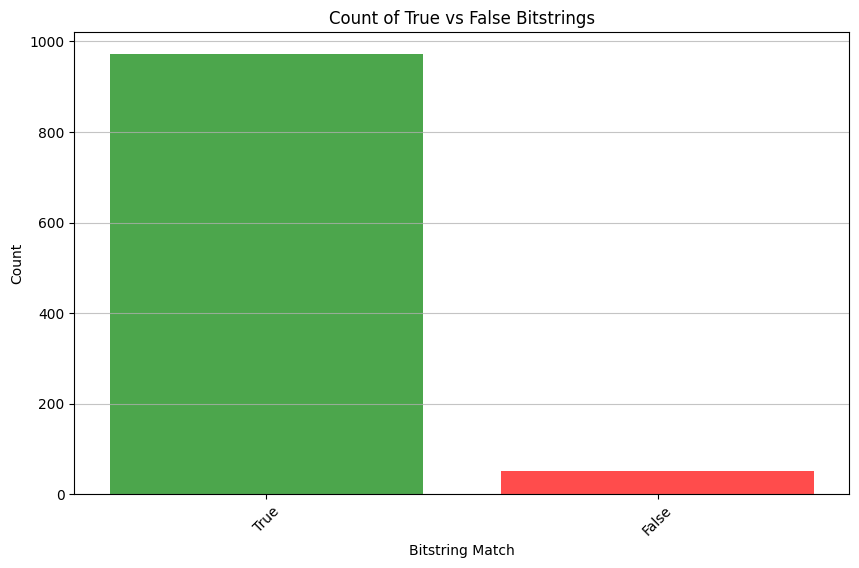

In [30]:
# generate a plot by histogram based on the count result using plt
import matplotlib.pyplot as plt

trueCount = countTrue
falseCount = countFalse
# Create a histogram based on the count result
plt.figure(figsize=(10, 6))
plt.bar(['True', 'False'], [trueCount, falseCount], color=['green', 'red'], alpha=0.7)
plt.title('Count of True vs False Bitstrings')
plt.xlabel('Bitstring Match')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()